# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Base de dados de clientes, com variados tipos de dados, sobre diferentes assuntos relacionados ao cliente, que em um conjuntoirá ajudar a prever a renda de futuros clientes com base nessas informações apresentadas.


## Etapa 2 Crisp-DM: Entendimento dos dados



### Dicionário de dados



| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data referência da coleta                          | objetct      |
| id_cliente              |  Identidade do CLiente                              | int          |
| sexo                    |  Sexo do Cliente                                    | object       |
| posse_de_veiculo        |  Possui veículo próprio                             | bool         |
| posse_de_imovel         |  Possui imóvel próprio                              | bool         |
| qtd_filhos              |  Quantidade de filhos                               | int          |
| tipo_renda              |  Fonte de Renda                                     | object       |
| educacao                |  Nível educacional                                  | object       |
| estado_civil            |  Estado Civil                                       | object       |
| tipo_residencia         |  Tipo de Residência (alugada, pró´ria, etc)         | object       |
| idade                   |  Idade                                              | int          |
| tempo_emprego           |  Tempo no emprego atual                             | int          |
| qt_pessoas_residencia   |  Qauntidade de Pessoas por residência               | int          |
| renda                   |  Total da Renda                                     | int          |





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

import graphviz



from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [2]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [4]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [4]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [22]:
renda.isnull().sum()

Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [24]:
X = renda.drop(columns = ['Unnamed: 0', 'renda', 'data_ref', "id_cliente"]).copy()
X = pd.get_dummies(X, drop_first = True)
print(X.info())
X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               15000 non-null  bool   
 1   posse_de_imovel                15000 non-null  bool   
 2   qtd_filhos                     15000 non-null  int64  
 3   idade                          15000 non-null  int64  
 4   tempo_emprego                  12427 non-null  float64
 5   qt_pessoas_residencia          15000 non-null  float64
 6   sexo_M                         15000 non-null  uint8  
 7   tipo_renda_Bolsista            15000 non-null  uint8  
 8   tipo_renda_Empresário          15000 non-null  uint8  
 9   tipo_renda_Pensionista         15000 non-null  uint8  
 10  tipo_renda_Servidor público    15000 non-null  uint8  
 11  educacao_Pós graduação         15000 non-null  uint8  
 12  educacao_Secundário            15000 non-null 

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,False,True,0,26,6.602740,1.0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1,True,True,0,28,7.183562,2.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,True,True,0,35,0.838356,2.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,False,True,1,30,4.846575,3.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,True,False,0,33,4.293151,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,False,True,0,48,13.887671,1.0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
14996,False,True,0,57,NaN,1.0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
14997,True,True,0,45,7.832877,2.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14998,True,False,0,36,4.298630,2.0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [26]:
y =  renda.loc[:,'renda']
y

0         8060.34
1         1852.15
2         2253.89
3         6600.77
4         6475.97
           ...   
14995     7990.58
14996    10093.45
14997      604.82
14998     3352.27
14999     1160.99
Name: renda, Length: 15000, dtype: float64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [28]:
X_train.tempo_emprego = renda.tempo_emprego.fillna(renda.tempo_emprego.median())

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
X_test.tempo_emprego = renda.tempo_emprego.fillna(renda.tempo_emprego.median())

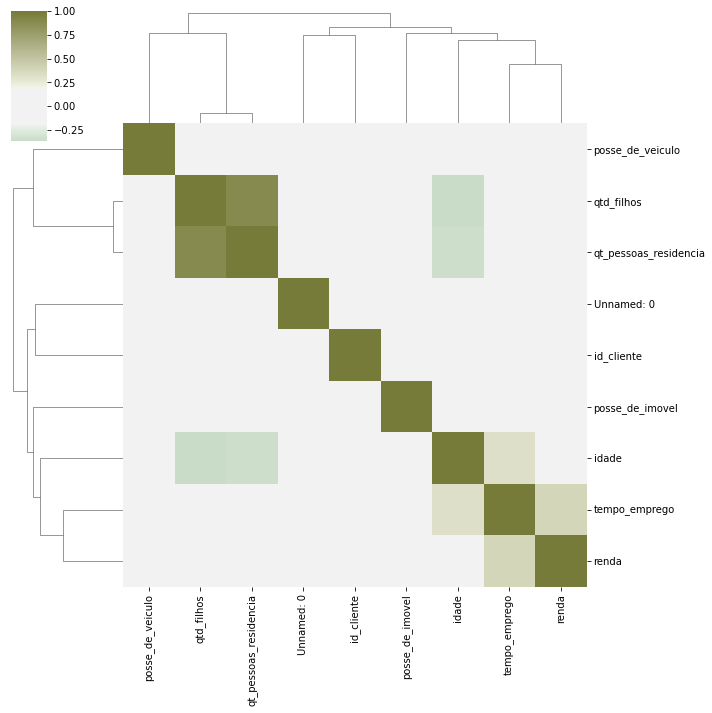

In [32]:
cmap = sns.diverging_palette(h_neg=125, h_pos=450, as_cmap=True, sep = 50, center = 'light')

sns.clustermap(renda.corr(), figsize=(10, 10), center = 0, cmap=cmap)

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


- O teste selecionado foi arvore de decisao pelo fato de serem muitas variáveis

### Rodando o modelo


In [33]:
X_train.isna().sum()

posse_de_veiculo                 0
posse_de_imovel                  0
qtd_filhos                       0
idade                            0
tempo_emprego                    0
qt_pessoas_residencia            0
sexo_M                           0
tipo_renda_Bolsista              0
tipo_renda_Empresário            0
tipo_renda_Pensionista           0
tipo_renda_Servidor público      0
educacao_Pós graduação           0
educacao_Secundário              0
educacao_Superior completo       0
educacao_Superior incompleto     0
estado_civil_Separado            0
estado_civil_Solteiro            0
estado_civil_União               0
estado_civil_Viúvo               0
tipo_residencia_Casa             0
tipo_residencia_Com os pais      0
tipo_residencia_Comunitário      0
tipo_residencia_Estúdio          0
tipo_residencia_Governamental    0
dtype: int64

In [34]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [35]:
mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O R-quadrado da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O R-quadrado da árvore com profundidade=2 é: 0,29
O R-quadrado da árvore com profundidade=8 é: 0,65


In [36]:
regr_tr1=regr_2.fit(X_train, y_train)
y_chapeu_teste = regr_tr1.predict(X_train)
y_chapeu_teste

array([ 3560.54674641, 12533.584375  ,  3937.01495146, ...,
        5444.63606115,  3560.54674641,  1773.38673913])

In [37]:
path = regr_2.cost_complexity_pruning_path(X_train, y_train)
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,2.467931e+07
1,4.434856e+01,2.467935e+07
2,1.185153e+02,2.467947e+07
3,2.082311e+02,2.467968e+07
4,5.986715e+02,2.468028e+07
...,...,...
122,2.446284e+06,4.220445e+07
123,2.498525e+06,4.470298e+07
124,3.519755e+06,4.822273e+07
125,5.107385e+06,5.333012e+07


Text(0, 0.5, 'Impureza total das folhas')

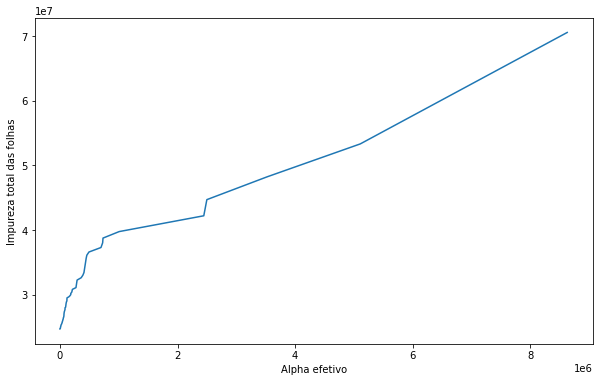

In [38]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

In [39]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

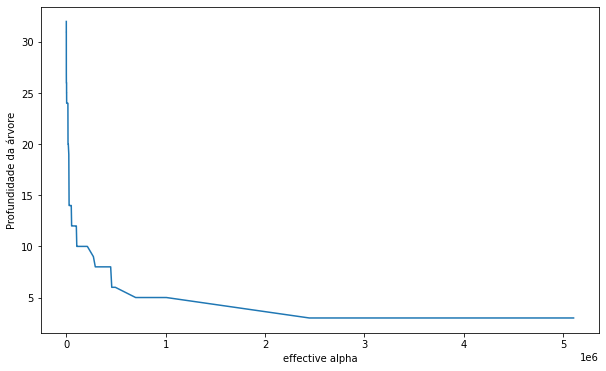

In [40]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

In [41]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

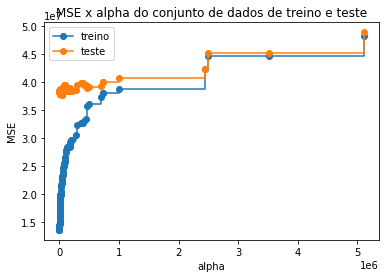

In [42]:

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [43]:
regr_3 = DecisionTreeRegressor(random_state = 0, ccp_alpha = 2)

regr_3.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=2, random_state=0)

In [44]:
mse3 = regr_3.score(X_train, y_train)
template = 'O R-quadrado da árvore é: {1:.2f}'
print(template.format(regr_3.get_depth(), mse3). replace('.',','))

O R-quadrado da árvore é: 0,81


In [47]:
y_pred = regr_3.predict(X_train)
r2_score(y_train, y_pred)

0.80804867979416

In [56]:
import dataframe_image as dfi

In [54]:
import os

tree_data = tree.export_graphviz(regr_3, out_file = None,
                                feature_names = X_train.columns,
                                filled = True)
graph = graphviz.Source(tree_data, format = 'png')
graph



<Figure size 432x288 with 0 Axes>

In [60]:
from sklearn.tree import export_graphviz


## Etapa 5 Crisp-DM: Avaliação dos resultados


- No fim consegui uma melhora significativa de r2 utilizando a arvore de decisão. Ao realizar o gráfico indicando o melhor MSE de cada ccp_alpha, fui capaz de cehgar na concllusão que me daria o maior r2, que é 0,81;
- Ajustei o ccp_alpha para 2 em random state = 0;

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.